<a href="https://colab.research.google.com/github/HopeRetina/hope_play/blob/main/hope_play_generating_borders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
cv2.__version__

'4.1.2'

## This script shows how to generate borders around objects for semantic segmentation. We'll first erode and then dilat, and use the dilated image minus the eroded one to get our border.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def make_border(image, border_size=5, num_erosions=1):
  erosion_kernel = np.ones((3,3), np.uint8) # Here start by eroding the peripheral pixels
  eroded_img = cv2.erode(image, erosion_kernel, iterations=num_erosions)

  # Define kernel size for dilation based on the desired border size (add 1 to keep it odd)
  kernel_size = 2 * border_size + 1
  dilation_kernel = np.ones((kernel_size, kernel_size), np.uint8)
  dilated = cv2.dilate(eroded_img, dilation_kernel, iterations=1)
  # plt.imshow(dilated, cmap='gray')

  dilated_127 = np.where(dilated==255, 147, dilated)

  result = np.where(eroded_img > 127, 255, dilated_127)

  #plt.imshow(result, cmap='gray')

  return result

# Now test the function with an image

## Load data

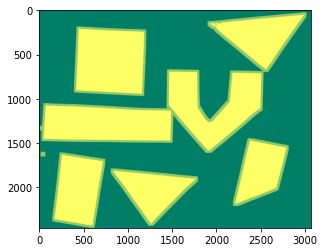

In [ ]:
img = cv2.imread('random_shapes.png', cv2.IMREAD_GRAYSCALE)
img_w_border = make_border(img, border_size=25)
plt.imshow(img_w_border, cmap='summer')